# Alternate version of convergence rate test: $K_j / \lambda_j$

James Yu, 24 July 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [2]:
def ratio(delta, c, lambda_j):
    K_j_star = ((delta + delta*c*lambda_j**2 - c) + sqrt((c-delta-delta*c*lambda_j**2)**2 + 4*delta*c)) / (2 * delta)
    return K_j_star / lambda_j

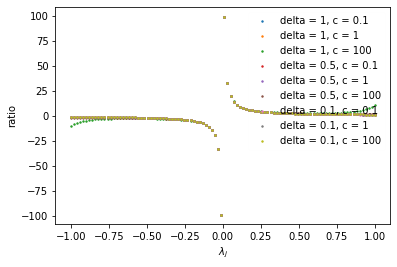

In [3]:
linsp = np.linspace(-1, 1, 100)

plt.scatter(linsp, [ratio(1, 0.1, lambda_j) for lambda_j in linsp], label = "delta = 1, c = 0.1", s = 2)
plt.scatter(linsp, [ratio(1, 1, lambda_j) for lambda_j in linsp], label = "delta = 1, c = 1", s = 2)
plt.scatter(linsp, [ratio(1, 100, lambda_j) for lambda_j in linsp], label = "delta = 1, c = 100", s = 2)

plt.scatter(linsp, [ratio(0.5, 0.1, lambda_j) for lambda_j in linsp], label = "delta = 0.5, c = 0.1", s = 2)
plt.scatter(linsp, [ratio(0.5, 1, lambda_j) for lambda_j in linsp], label = "delta = 0.5, c = 1", s = 2)
plt.scatter(linsp, [ratio(0.5, 100, lambda_j) for lambda_j in linsp], label = "delta = 0.5, c = 100", s = 2)

plt.scatter(linsp, [ratio(0.1, 0.1, lambda_j) for lambda_j in linsp], label = "delta = 0.1, c = 0.1", s = 2)
plt.scatter(linsp, [ratio(0.1, 1, lambda_j) for lambda_j in linsp], label = "delta = 0.1, c = 1", s = 2)
plt.scatter(linsp, [ratio(0.1, 100, lambda_j) for lambda_j in linsp], label = "delta = 0.1, c = 100", s = 2)
plt.legend(framealpha = 0.01)
plt.xlabel("$\lambda_j$")
plt.ylabel("ratio")
plt.show()

The function does not actually appear to be decreasing everywhere, which is odd.

In [4]:
delta, c, lambda_j = symbols("delta c lambda_j")
rho = ratio(delta, c, lambda_j)
rho

(c*delta*lambda_j**2 - c + delta + sqrt(4*c*delta + (-c*delta*lambda_j**2 + c - delta)**2))/(2*delta*lambda_j)

In [5]:
deriv = simplify(diff(rho, lambda_j))
deriv

(c*delta*lambda_j**2*(c*delta*lambda_j**2 - c + delta + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)) + sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2)*(-c*delta*lambda_j**2 + c - delta - sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2))/2)/(delta*lambda_j**2*sqrt(4*c*delta + (c*delta*lambda_j**2 - c + delta)**2))

The denominator is positive. If we expand the numerator:

In [6]:
expand(fraction(deriv)[0])

c**2*delta**2*lambda_j**4/2 - c**2/2 + c*delta*lambda_j**2*sqrt(c**2*delta**2*lambda_j**4 - 2*c**2*delta*lambda_j**2 + c**2 + 2*c*delta**2*lambda_j**2 + 2*c*delta + delta**2)/2 - c*delta + c*sqrt(c**2*delta**2*lambda_j**4 - 2*c**2*delta*lambda_j**2 + c**2 + 2*c*delta**2*lambda_j**2 + 2*c*delta + delta**2)/2 - delta**2/2 - delta*sqrt(c**2*delta**2*lambda_j**4 - 2*c**2*delta*lambda_j**2 + c**2 + 2*c*delta**2*lambda_j**2 + 2*c*delta + delta**2)/2

$c^2\delta^2\lambda_j^4 - c^2 = c^2(\delta^2\lambda_j^4 - 1) \leq 0$, so the first two terms together are negative.

$c\delta\lambda_j^2 + c - \delta = \delta(c\lambda_j^2 - 1) + c$. This is ambiguous, so the square root terms together may not necessarily be negative.

In [7]:
simplify(deriv.subs(delta, 0.9).subs(lambda_j, 1).subs(c, 100.0))

50.1202921502506

In [8]:
simplify(deriv.subs(delta, 0.9).subs(lambda_j, 1).subs(c, 0.1))

-0.907837862894675

Indeed, this is the case.

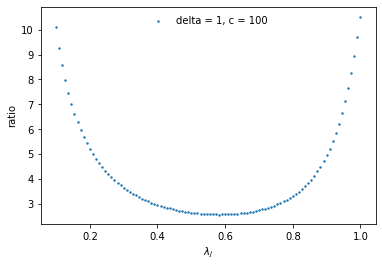

In [9]:
plt.scatter(np.linspace(0.1, 1, 100), [ratio(1, 100, lambda_j) for lambda_j in np.linspace(0.1, 1, 100)], label = "delta = 1, c = 100", s = 2)
plt.legend(framealpha = 0.01)
plt.xlabel("$\lambda_j$")
plt.ylabel("ratio")
plt.show()

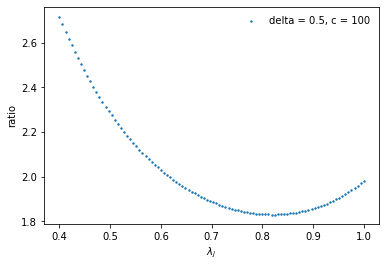

In [10]:
plt.scatter(np.linspace(0.4, 1, 100), [ratio(0.5, 100, lambda_j) for lambda_j in np.linspace(0.4, 1, 100)], label = "delta = 0.5, c = 100", s = 2)
plt.legend(framealpha = 0.01)
plt.xlabel("$\lambda_j$")
plt.ylabel("ratio")
plt.show()

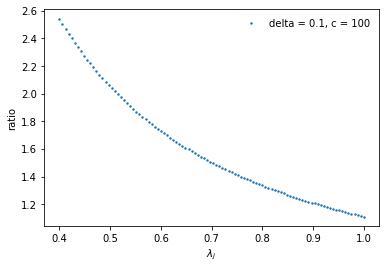

In [11]:
plt.scatter(np.linspace(0.4, 1, 100), [ratio(0.1, 100, lambda_j) for lambda_j in np.linspace(0.4, 1, 100)], label = "delta = 0.1, c = 100", s = 2)
plt.legend(framealpha = 0.01)
plt.xlabel("$\lambda_j$")
plt.ylabel("ratio")
plt.show()